
# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ ‚Ññ3
## **–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ Random Forest –∏ Gradient Boosting –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏**
#### –í—ã–ø–æ–ª–Ω–∏–ª: –ê—Ä—Ç–∞–º–æ–Ω–æ–≤ –î., –ú–ê–ì –ò–ê–î 2020
https://www.kaggle.com/gauravdesurkar/lt-vehicle-loan-default-prediction

–û–±—É—á–∏—Ç—å –Ω–∞ –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö 1) random forests, 2) gradient boosted trees. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏ (–Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –∏ –æ–±—É—á–∞—é—â–µ–π—Å—è –≤—ã–±–æ—Ä–∫–∞—Ö, –∞ —Ç–∞–∫–∂–µ oob-–æ—à–∏–±–∫—É) –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–µ—Ä–µ–≤—å–µ–≤. –ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ª–∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ/–Ω–µ–¥–æ–æ–±—É—á–µ–Ω–∏–µ? –ù–∞–π–¥–∏—Ç–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã. –°–¥–µ–ª–∞–π—Ç–µ –æ–±—â–∏–µ –≤—ã–≤–æ–¥—ã –ø–æ –≤—Å–µ–º –ª–∞–±–∞–º. –ö–∞–∫–æ–π –º–µ—Ç–æ–¥ –æ–∫–∞–∑–∞–ª—Å—è –ª—É—á—à–∏–º?

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from tqdm import tqdm
from collections import OrderedDict

from torch.utils.data import DataLoader
import torch
import os
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def dump(d, name):
    with open(name, 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
def pickle_load(name):
    with open(name, 'rb') as p:
        obj = pickle.load(p)
    return obj

In [36]:
def merge_and_order(d1,d2):
    d = {**d1, **d2}
    accuracy_train_dict = OrderedDict(sorted(d.items()))
    return accuracy_train_dict

–í—Å–ø–æ–º–Ω–∏–º –∫–∞–∫ –≤—ã–≥–ª—è–¥—è—Ç –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ

In [6]:
data_path = 'VehicleLoanDefaultPrediction'
data = pd.read_csv(os.path.join(data_path, 'train.csv'))

In [142]:
data.head(5)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...  \
0               45                1441      01-01-84        Salaried  ...   
1               45                1502      31-07-85   Self employed  ...   
2               45                1497      24-08-85   Self employed  ...   
3               45                1501      30-12-93   Self employed  ...   
4               45                1495      09-12-77   Self employed  ...   

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                     0                     0                   0   
1                     0                     0                1991   
2                     0                     0                   0   
3                     0                     0                  31   
4                     0                     0                   0   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 41 columns]

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è  –Ω–∞–ø–∏—Å–∞–Ω–Ω—ã–º –∫–ª–∞—Å—Å–æ–º Pytorch Loan Dataset –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏

In [4]:
import loan_dataset

In [7]:
dataset = loan_dataset.VehicleLoanDataset(os.path.join(data_path, 'train.csv'), balance=True, mode='train', test_size=0.2)

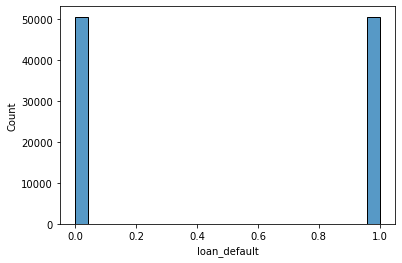

In [8]:
sns.histplot(dataset.data, x="loan_default")
plt.show()

In [8]:
print(f'–†–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {dataset.X_train.shape}\n—Ä–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {dataset.X_test.shape}')

–†–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: (80977, 35)
—Ä–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: (20245, 35)


In [9]:
X_train, y_train = dataset.X_train, dataset.y_train.reshape(-1,)
X_test, y_test = dataset.X_test, dataset.y_test.reshape(-1,)

In [10]:
features = dataset.data.columns

## Random Forest

In [11]:
from sklearn import ensemble

In [83]:
rf_model = ensemble.RandomForestClassifier(n_estimators = 100,  oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [84]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [85]:
print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.00023463452585301999
0.4087428994813534


In [86]:
print(np.mean(y_train_pred == y_train))
print(np.mean(y_test_pred == y_test))

0.999765365474147
0.5912571005186466


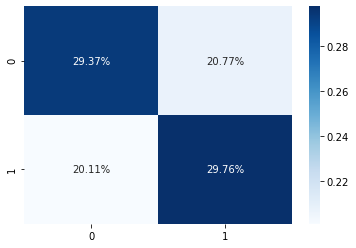

In [89]:
CF = confusion_matrix(y_test_pred, y_test)
sns.heatmap(CF/np.sum(CF), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

–ù–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ—á—Ç–∏ 100%, —Ç–æ –µ—Å—Ç—å –º–æ–¥–µ–ª—å –ø–µ—Ä–µ–æ–±—É—á–∏–ª–∞—Å—å –ø–æ–¥ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫—É. 

–ö–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ [–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ—Ç –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤—å–µ–≤, —Ç–æ –µ—Å—Ç—å –∫–∞–∂–¥–æ–µ –¥–µ—Ä–µ–≤–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—á–µ–Ω—å –≥–ª—É–±–æ–∫–∏–º –∏ –æ–±—É—á–∞—Ç—å—Å—è –ø–æ–¥ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—É—é –≤—ã–±–æ—Ä–∫—É

### –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—à–∏–±–∫–∏ –æ—Ç —á–∏—Å–ª–∞ –¥–µ—Ä–µ–≤—å–µ–≤

–û–±—É—á–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º —á–∏—Å–ª–æ–º –¥–µ—Ä–µ–≤—å–µ–≤ –≤ –ª–µ—Å—É

In [63]:
accuracy_train_dict = {}
accuracy_test_dict = {}
oob_score_dict = {}
accuracy_train_dict2 = {}
accuracy_test_dict2 = {}
oob_score_dict2 = {}

–ë—É–¥–µ–º –∏—Ç–µ—Ä–∏—Ä–æ–≤–∞—Ç—å—Å—è –æ—Ç 5 –¥–æ 500 –¥–µ—Ä–µ–≤—å–µ–≤ —Å —à–∞–≥–æ–º 20 –∏ –æ—Ç 5 –¥–æ 100 —Å —à–∞–≥–æ–º 5

In [ ]:
for n_estimators in tqdm(range(5,500,20)):
    rf_model = ensemble.RandomForestClassifier(n_estimators=n_estimators,  oob_score=True)
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)
    
    accuracy_train_dict[n_estimators] = accuracy_score(y_train_pred, y_train)
    accuracy_test_dict[n_estimators] = accuracy_score(y_test_pred, y_test)
    oob_score_dict[n_estimators] = rf_model.oob_score_
    

In [53]:
accuracy_train_dict = merge_and_order(accuracy_train_dict2, accuracy_train_dict)
accuracy_test_dict = merge_and_order(accuracy_test_dict2, accuracy_test_dict)
oob_score_dict = merge_and_order(oob_score_dict2, oob_score_dict)

–í—Å–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∑–∞—Å—É–Ω–µ–º –≤ DataFrame

In [73]:
n_estimators_experiment = pd.DataFrame.from_dict(accuracy_train_dict, orient='index', columns=['accuracy_train'])
n_estimators_experiment['accuracy_test'] = accuracy_test_dict.values()
n_estimators_experiment['oob_score'] = oob_score_dict.values()
n_estimators_experiment.to_csv('n_estimators_experiment.csv')

In [80]:
n_estimators_experiment.head()

accuracy_train  accuracy_test  oob_score
5         0.954580       0.554013   0.533596
10        0.984020       0.556829   0.544550
15        0.994900       0.571005   0.553182
20        0.997691       0.576389   0.559591
25        0.998839       0.578266   0.565605

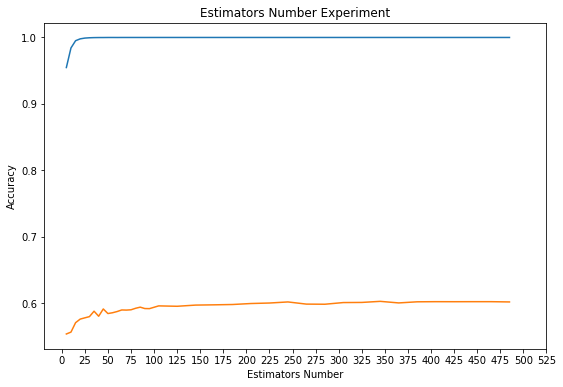

In [129]:
plt.figure(figsize=(9,6))
plt.title('Estimators Number Experiment')
plt.plot(n_estimators_experiment.index,n_estimators_experiment['accuracy_train'])
plt.plot(n_estimators_experiment.index,n_estimators_experiment['accuracy_test'])
plt.xlabel('Estimators Number')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,550,25))
plt.show()

In [113]:
n_estimators_experiment.max()

accuracy_train    0.999778
accuracy_test     0.603062
oob_score         0.597688
dtype: float64

In [114]:
n_estimators_experiment.min()

accuracy_train    0.954580
accuracy_test     0.554013
oob_score         0.533596
dtype: float64

–í–∏–¥–Ω–æ, —á—Ç–æ —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç —Å–≤–æ–µ–≥–æ –º–∞–∫—Å–∏–º—É–º–∞ –ø—Ä–∏ –º–∞–ª–æ–º —á–∏—Å–ª–µ –¥–µ—Ä–µ–≤—å–µ–≤ (–º–µ–Ω—å—à–µ 50). 
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–µ —Ç–µ—Å—Ç–µ –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å—Å—è —Å —Ä–æ—Å—Ç–æ–º —á–∏—Å–ª–∞ –¥–µ—Ä–µ–≤—å–µ–≤. –û–¥–Ω–∞–∫–æ –ø–æ—Å–ª–µ 250 –¥–µ—Ä–µ–≤—å–µ–≤ –≤–∏–¥–µ–Ω –Ω–µ–±–æ–ª—å—à–æ–π —Å–ø–∞–¥ –≤ —Ç–æ—á–Ω–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–π —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏. –° –¥—Ä—É–≥–æ–π —Å—Ç–æ—Ä–æ–Ω—ã, –ø—Ä–∏ —á–∏—Å–ª–µ –¥–µ—Ä–µ–≤—å–µ–≤ –æ—Ç 25 –¥–æ 50 –≤–∏–¥–Ω—ã –ø–∏–∫–∏, –Ω–æ –æ–Ω–∏ –Ω–µ –¥–æ—Å—Ç–∏–≥–∞—é—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏

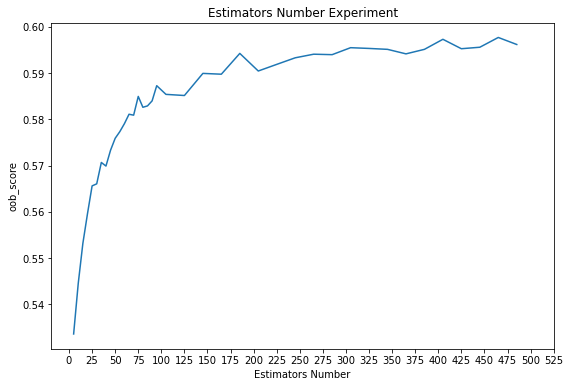

In [126]:
plt.figure(figsize=(9,6))
plt.title('Estimators Number Experiment')
plt.plot(n_estimators_experiment.index,n_estimators_experiment['oob_score'])
plt.xlabel('Estimators Number')
plt.ylabel('oob_score')
plt.xticks(np.arange(0,550,25))
plt.show()

### –ó–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å —Å 250 –¥–µ—Ä–µ–≤—å—è–º–∏

In [76]:
rf_model = ensemble.RandomForestClassifier(n_estimators = 250,  oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, oob_score=True)

In [77]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [78]:
print(f'Training accuracy score is {accuracy_score(y_train,y_train_pred)}, F1-score is {f1_score(y_train,y_train_pred)}')
print(f'Testing accuracy score is {accuracy_score(y_test,y_test_pred)}, F1-score is {f1_score(y_test,y_test_pred)}')

Training accuracy score is 0.9997530162885757, F1-score is 0.9997523955728328
Testing accuracy score is 0.598369967893307, F1-score is 0.6022988505747128


In [160]:
importances = rf_model.feature_importances_
importances = rf_model.feature_importances_
indices = np.argsort(importances)[:-11:-1]

In [161]:
print("Feature ranking:")
for i in indices:
    print(f'feature {features[i]}: ({importances[i]})')

Feature ranking:
feature ltv: (0.11529064914601447)
feature disbursed_amount: (0.10856523997223494)
feature asset_cost: (0.10331785312273219)
feature Employee_code_ID: (0.09585436160856052)
feature supplier_id: (0.0917593710473723)
feature Date.of.Birth: (0.08508316879819029)
feature branch_id: (0.07070954748650789)
feature PERFORM_CNS.SCORE: (0.03437009669576087)
feature CREDIT.HISTORY.LENGTH: (0.02854804753613667)
feature manufacturer_id: (0.02696224917378047)


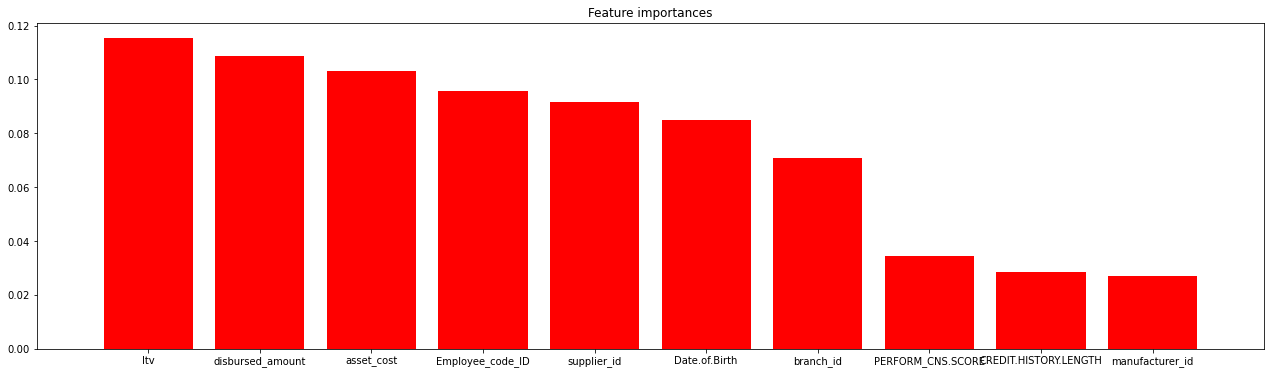

In [170]:
plt.figure(figsize=(22,6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices], align = 'center', color = 'r')
plt.xticks(range(10), np.array(features)[indices])
plt.xlim([-1, 10])
plt.show()

–ú–æ–¥–µ–ª—å –≤—ã–¥–µ–ª—è–µ—Ç —Å–ª–µ–¥—é—â–∏–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø—Ä–∏ –ø—Ä–∏–Ω—è—Ç–∏–∏ —Ä–µ—à–µ–Ω–∏—è:
1. ltv - –û—Ç–Ω–æ—à–µ–Ω–∏–µ –∑–∞—ë–º–∞ –∫ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∞–∫—Ç–∏–≤–∞
1. disbursed_amount - –°—É–º–º–∞ –≤—ã–¥–∞–Ω–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞
1. asset_cost - –°—Ç–æ–∏–º–æ—Å—Ç—å –∞–∫—Ç–∏–≤–∞
1. Employee_code_ID - ID —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–≤—à–∏–π –≤—ã–ø–ª–∞—Ç—É
1. supplier_id - –ê–≤—Ç–æ—Å–∞–ª–æ–Ω, —É –∫–æ—Ç–æ—Ä–æ–≥–æ –±—ã–ª –≤—ã–¥–∞–Ω –∑–∞–µ–º
1. Date.of.Birth - 	–î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è –ø–æ–∫—É–ø–∞—Ç–µ–ª—è
1. branch_id - –§–∏–ª–∏–∞–ª, –≤ –∫–æ—Ç–æ—Ä–æ–º –±—ã–ª –≤—ã–¥–∞–Ω –∫—Ä–µ–¥–∏—Ç

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –Ω–∞—Ä—è–¥—É —Å–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∞–∫—Ç–∏–≤–∞ –∏ —Å—É–º–º–æ–π –≤—ã–¥–∞–Ω–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞, –º–æ–¥–µ–ª—å –æ—Ç–º–µ—Ç–∏–ª–∞ –≤–∞–∂–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, –æ—Ç–Ω–æ—Å—è—â–∏–µ –∫ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∫—Ä–µ–¥–∏—Ç–æ—Ä–µ –∏ –∞–≤—Ç–æ—Å–∞–ª–æ–Ω–µ. –•–æ—Ç—è –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ —ç—Ç–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–∏–∫–∞–∫ –Ω–µ –¥–æ–ª–∂–Ω–∞ –≤–ª–∏—è—Ç—å –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –º–æ–¥–µ–ª–∏

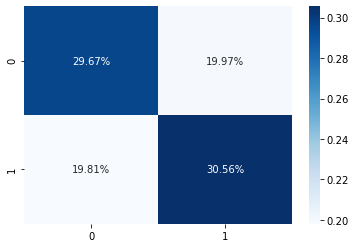

In [15]:
CF = confusion_matrix(y_test_pred, y_test)
sns.heatmap(CF/np.sum(CF), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

## Gradient Boosting

–ü—Ä–∏—à–ª–æ –≤—Ä–µ–º—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ üòé

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å–∫–∏ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º –¥–µ—Ä–µ–≤—å–µ–≤

In [31]:
accuracy_train_dict = {}
accuracy_test_dict = {}

In [42]:
for n_estimators in tqdm(range(500,800,50)):
    rf_model = ensemble.AdaBoostClassifier(n_estimators=n_estimators)
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)
    
    accuracy_train_dict2[n_estimators] = accuracy_score(y_train_pred, y_train)
    accuracy_test_dict2[n_estimators] = accuracy_score(y_test_pred, y_test)
    
dump(accuracy_train_dict2, 'accuracy_train_dict2.pickle')
dump(accuracy_test_dict2, 'accuracy_test_dict2.pickle')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [11:02<00:00, 110.43s/it]


In [43]:
accuracy_train_dict = merge_and_order(accuracy_train_dict2, accuracy_train_dict)
accuracy_test_dict = merge_and_order(accuracy_test_dict2, accuracy_test_dict)

In [44]:
n_estimators_experiment = pd.DataFrame.from_dict(accuracy_train_dict, orient='index', columns=['accuracy_train'])
n_estimators_experiment['accuracy_test'] = accuracy_test_dict.values()
n_estimators_experiment.to_csv('n_estimators_experiment_adaboost.csv')

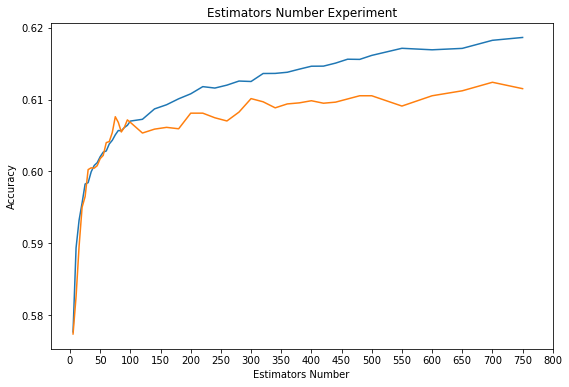

In [53]:
plt.figure(figsize=(9,6))
plt.title('Estimators Number Experiment')
plt.plot(n_estimators_experiment.index,n_estimators_experiment['accuracy_train'])
plt.plot(n_estimators_experiment.index,n_estimators_experiment['accuracy_test'])
plt.xlabel('Estimators Number')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,810,50))
plt.show()

In [54]:
n_estimators_experiment.max()

accuracy_train    0.618632
accuracy_test     0.612398
dtype: float64

In [55]:
n_estimators_experiment.min()

accuracy_train    0.577670
accuracy_test     0.577377
dtype: float64

–í –æ—Ç–ª–∏—á–∏–µ –æ—Ç Random Forest, –º–æ–¥–µ–ª—å –ø–µ—Ä–µ–æ–±—É—á–∞–µ—Ç—Å—è –≥–æ—Ä–∞–∑–¥–æ –º–µ–Ω—å—à–µ, –∞ —Ç–µ—Å—Ç–æ–≤–∞—è accuracy –¥–∞–∂–µ –Ω–µ–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ. –ü—Ä–∏ —ç—Ç–æ–º, —Ä–∞–∑–±—Ä–æ—Å accuracy –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –±–æ–ª—å—à–µ, –∞ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π - –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç —Ä–∞—Å—Ç–∏, —Ö–æ—Ç—å –∏ –¥–æ–æ–ª—å–Ω–æ –º–µ–¥–ª–µ–Ω–Ω–æ

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å —Å 300 –¥–µ—Ä–µ–≤—å—è–º–∏

In [59]:
rf_model = ensemble.AdaBoostClassifier(n_estimators = 300)
rf_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=300)

In [60]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [72]:
print(f'Training accuracy score is {accuracy_score(y_train,y_train_pred)}, F1-score is {f1_score(y_train,y_train_pred)}')

Training accuracy score is 0.612507255146523, F1-score is 0.6243055555555556


In [73]:
print(f'Testing accuracy score is {accuracy_score(y_test,y_test_pred)}, F1-score is {f1_score(y_test,y_test_pred)}')

Testing accuracy score is 0.6101259570264262, F1-score is 0.6262607131019461


In [62]:
importances = rf_model.feature_importances_
importances = rf_model.feature_importances_
indices = np.argsort(importances)[:-11:-1]

In [63]:
print("Feature ranking:")
for i in indices:
    print(f'feature {features[i]}: ({importances[i]})')

Feature ranking:
feature branch_id: (0.27666666666666667)
feature supplier_id: (0.09333333333333334)
feature ltv: (0.07)
feature PERFORM_CNS.SCORE: (0.07)
feature disbursed_amount: (0.05333333333333334)
feature Employee_code_ID: (0.05)
feature Date.of.Birth: (0.04)
feature PRI.CURRENT.BALANCE: (0.03666666666666667)
feature PRI.ACTIVE.ACCTS: (0.03)
feature asset_cost: (0.023333333333333334)


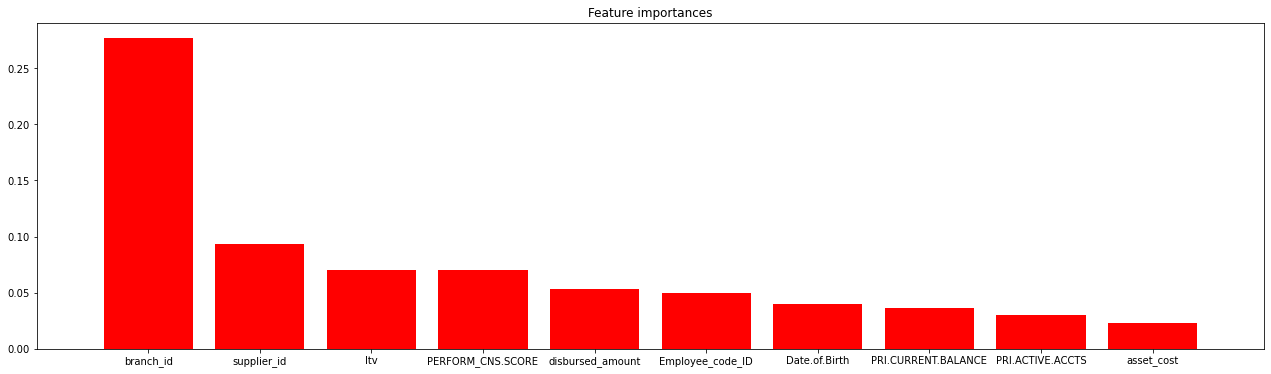

In [64]:
plt.figure(figsize=(22,6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices], align = 'center', color = 'r')
plt.xticks(range(10), np.array(features)[indices])
plt.xlim([-1, 10])
plt.show()

–¢–µ–ø–µ—Ä—å —Å–∞–º—ã–π –≥–ª–∞–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ - —ç—Ç–æ branch_id - —Ñ–∏–ª–∏–∞–ª, –≤ –∫–æ—Ç–æ—Ä–æ–º –±—ã–ª –≤—ã–¥–∞–Ω –∫—Ä–µ–¥–∏—Ç.  –ö–∞–∂–µ—Ç—Å—è –º–æ–¥–µ–ª—å —á—Ç–æ-—Ç–æ –∑–Ω–∞–µ—Ç –ø—Ä–æ –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π –±–∏–∑–Ω–µ—Å üòÅ

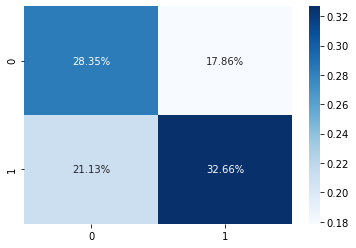

In [75]:
CF = confusion_matrix(y_test_pred, y_test)
sns.heatmap(CF/np.sum(CF), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

## –í—ã–≤–æ–¥

–í —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å –ø—Ä–µ–¥–µ–¥—É—â–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (kNN, SVM –∏ –Ω–µ–π—Ä–æ–Ω–æ—á–∫–∏) –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –ø–æ–∫–∞–∑–∞–ª —Å–∞–º—ã–π –ª—É—á—à–∏–π (—Ö–æ—Ç—è –ø–æ-–ø—Ä–µ–∂–Ω–µ–º—É –¥–æ–≤–æ–ª—å–Ω–æ —Å–∫—Ä–æ–º–Ω—ã–π) —Ä–µ–∑—É–ª—å—Ç–∞—Ç: –ø—Ä–∏–º–µ—Ä–Ω–æ 61% —Ç–æ—á–Ω–æ—Å—Ç–∏. 

–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ–Ω–∏ –Ω–µ—Å—É—Ç –º–∞–ª–æ –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –¥–ª—è –º–æ–¥–µ–ª–∏, –∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π –ª–∏—à—å –æ–ø–∏—Å–∞–Ω–∏–µ –∏ —Å–æ–ø—É—Ç—Å—Ç–≤—É—é—â–∏–µ –¥–∞–Ω–Ω—ã–π —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π –∫—Ä–µ–¥–∏—Ç–Ω–æ–π —Å–¥–µ–ª–∫–∏